In [1]:
import os
import sys
import argparse
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


        for run_name in ["bf", "gd"]:
#         for run_name in ["gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name and timeout_name == "5_5":
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads/result/workload_1/bf
10.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 14.pkl
[success]
16.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 16.pkl
[success]
18.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 18.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 2.pkl
[success]
20.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 20.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 24.pkl
[success]
4.pkl
[load output] ../../workload_manage/five_workloads/result/workl

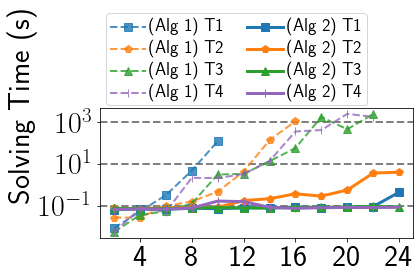

In [4]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

fig, ax = plt.subplots(figsize=(6, 4))

for run_name in ["bf", "gd_5_5"]:
    for workload in ["workload_1", "workload_2", "workload_3", "workload_5"]:


        if run_name == "bf":
            key_list = sorted(data[workload][run_name].keys())
        else:
            key_list = [i for i in range(2, 25, 2)]
        # print(key_list)
        plot_data = []
        actual_key_list = []
        min_list = []
        max_list = []
        
        for key in key_list:
            list_data = data[workload][run_name][key]["time"]
            if len(list_data) == 300:
                actual_key_list.append(key)
                plot_data.append(max(list_data))
        if workload == "workload_1":
            workload_name = "T1"
            marker = markerst1
            color='C0'
        if workload == "workload_2":
            workload_name = "T2"
            marker = markerst2
            color='C1'
        if workload == "workload_3":
            workload_name = "T3"
            marker = markerst3
            color='C2'
        if workload == "workload_4":
            workload_name = "T4"
            marker = markerst4
            color='C3'
        if workload == "workload_5":
            workload_name = "T4"
            marker = markerst5
            color='C4'


        if run_name == "bf":
            label = f"(Alg 1) {workload_name}"
#             color = "C17"
            linestyle = '--'
            alpha = 0.8
            linewidth=2
        
        elif run_name == "gd_5_5":
            label = f"(Alg 2) {workload_name}"
#             color = "black"
            linestyle = '-'
            alpha = 1
            linewidth=3

        else:
            label = f"(gd0) {workload_name}"
            color = "C2"
        ax.plot(actual_key_list, plot_data, label=label, color=color, marker=marker, alpha=alpha, linestyle=linestyle, linewidth=linewidth, markersize=8)
        # ax.errorbar(actual_key_list, plot_data, label=label, color=color, marker=marker, yerr=[min_list, max_list])
        # ax.errorbar(actual_key_list, max_list, label=label, color=color)
        # print("avg", plot_data)
        # print("max", max_list)
        # break
    # break

key_list = [i*2 for i in range(1, 16)]

ax.tick_params(axis='y', labelsize=20)
# ax.set_xticks(key_list)
# ax.set_xticklabels(key_list, fontsize=20)
plt.xticks(fontsize=30)
# ax.set_xlabel('Number of sketch instances', fontsize=20)

plt.yscale("log")
# ax.set_ylim([0, 1000000])
ax.set_ylabel('Solving Time (s)', fontsize=30)

# ax.tick_params(axis='y', labelsize=30)

new_x = [4, 8, 12, 16, 20, 24]
new_x_label = [4, 8, 12, 16, 20, 24]

ax.set_xticks(new_x)
ax.set_xticklabels(new_x_label, fontsize=30)

# new_y = [0.1, 10, 1000, 100000, 10000000]
# new_y_label = ["$10^{-1}$", "$10^{1}$", "$10^{3}$", "$10^{5}$", "$10^{7}$"]

new_y = [0.1, 10, 1000]
new_y_label = ["$10^{-1}$", "$10^{1}$", "$10^{3}$"]

# new_y_label = ["0.1", "10", "1000", "100000"]
ax.set_yticks(new_y)
ax.set_yticklabels(new_y_label, fontsize=30)

# plt.rc('ytick', labelsize=35)

# plt.rcParams.update({'font.size':30})
# ax.set_yticklabels(fontsize=30)



plt.legend(loc='lower left', bbox_to_anchor=(0.02, 1.02, 1, 0.102), fontsize=18, ncol=2,
           columnspacing=1.2,
           handleheight=0.0,
           handletextpad=0.2,
           borderaxespad=0.0,
           labelspacing=0.2,
           borderpad=0.2)
plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')
ax.yaxis.set_label_coords(-0.2,1.02)
fig.tight_layout()


# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
latex_path = "."
full_path = os.path.join(latex_path, "greedy_time.pdf")
plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
plt.show()


In [5]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

fig, ax = plt.subplots(figsize=(6, 4))

# fig, ax = plt.subplots(figsize=(10, 10))


for workload in ["workload_1", "workload_2", "workload_3", "workload_5"]:
    key_list = sorted(data[workload]["bf"].keys())

    plot_data = []
    actual_key_list = []
    min_list = []
    max_list = []
    for key in key_list:
        list_data = data[workload]["bf"][key]["time"]
        if len(list_data) == 300:
            actual_key_list.append(key)
            avg_resource = data[workload]["bf"][key]["mean_df"]["after"]
            bf_sum = sum(avg_resource)

            avg_resource = data[workload]["gd_5_5"][key]["mean_df"]["after"]
            gd_sum = sum(avg_resource)

            plot_data.append((gd_sum - bf_sum)/bf_sum * 100)

    if workload == "workload_1":
        workload_name = "T1"
        color = "C0"
        marker = markerst1
    if workload == "workload_2":
        workload_name = "T2"
        color = "C1"
        marker = markerst2
    if workload == "workload_3":
        workload_name = "T3"
        color = "C2"
        marker = markerst3
    if workload == "workload_4":
        workload_name = "T4"
        color = "C3"
        marker = markerst4
    if workload == "workload_5":
        workload_name = "T4"
        color = "C4"
        marker = markerst5
    ax.plot(actual_key_list, plot_data, label=workload_name, color=color, marker=marker, markersize=11, linewidth=3)

key_list = [i*2 for i in range(1, 16)]

ax.tick_params(axis='y', labelsize=30)
# ax.set_xticks(key_list)
# ax.set_xticklabels(key_list, fontsize=20)
# plt.xticks(fontsize=20)
# ax.set_xlabel('Number of sketch instances', fontsize=20)


new_x = [4, 8, 12, 16, 20]
new_x_label = [4, 8, 12, 16, 20]

ax.set_xticks(new_x)
ax.set_xticklabels(new_x_label, fontsize=30)


# new_y = [0.0, 0.5, 1.0, 1.5, 2.0]
# new_y_label = [0.0, 0.5, 1.0, 1.5, 2.0]
# new_y_label = ["0.1", "10", "1000", "100000"]
# ax.set_yticks(new_y)
# ax.set_yticklabels(new_y_label, fontsize=25)




# plt.yscale("log")
ax.set_ylim([-0.2, 4.0])
ax.set_ylabel('Objective Function\nIncrease (\%)', fontsize=30)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(1))

plt.legend(loc="upper left", fontsize=24, ncol=1)


# plt.legend(bbox_to_anchor=(0.19, 0.66), loc="center", fontsize=24, ncol=1,
#            handleheight=0.0,
#            handletextpad=0.2,
#            borderaxespad=0.0,
#            labelspacing=0.2,
#            borderpad=0.2)


plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')
fig.tight_layout()

# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
latex_path = "."
full_path = os.path.join(latex_path, "greedy_performance.pdf")
plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
plt.show()

IndentationError: unexpected indent (<ipython-input-5-95288ebcd400>, line 111)

In [31]:
for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    print(workload)
#     for run_name in ["bf"]:
#         "bf"
#         "gd_5_5"
#     print(run_name)
    key_list = sorted(data[workload]["bf"].keys())
    print(key_list)
    for key in key_list:
        print("key", key)
        list_data = data[workload]["bf"][key]["time"]
        size = len(list_data)
        if size >= 30:
            avg_data = sum(list_data) / size
            max_data = max(list_data)
            print("bf:", size, max_data)
            
            list_data = data[workload]["gd_5_5"][key]["time"]
            size = len(list_data)
            avg_data = sum(list_data) / size
            max_data = max(list_data)
            print("gd:", size, max_data)
            print()

        


workload_1
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
key 2
bf: 300 0.008646000000000001
gd: 300 0.064917

key 4
bf: 300 0.054532000000000004
gd: 300 0.073292

key 6
bf: 300 0.326058
gd: 300 0.069238

key 8
bf: 300 4.869243
gd: 300 0.07764

key 10
bf: 300 121.281276
gd: 300 0.07405

key 12
bf: 65 3895.015931
gd: 300 0.080994

key 14
key 16
key 18
key 20
key 22
key 24
workload_2
[2, 4, 6, 8, 10, 12, 14, 16, 18]
key 2
bf: 300 0.027757
gd: 300 0.07672400000000001

key 4
bf: 300 0.027981
gd: 300 0.07491

key 6
bf: 300 0.100174
gd: 300 0.082912

key 8
bf: 300 0.162539
gd: 300 0.084924

key 10
bf: 300 0.481627
gd: 300 0.08520900000000001

key 12
bf: 300 4.365552999999999
gd: 300 0.180286

key 14
bf: 300 137.966479
gd: 300 0.221758

key 16
bf: 300 1107.373883
gd: 300 0.37893299999999996

key 18
bf: 79 1930.0336510000002
gd: 300 0.294344

workload_3
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
key 2
bf: 300 0.005674
gd: 300 0.076116

key 4
bf: 300 0.036978000000000004
gd: 300 0.072898

key 6

In [30]:
for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    print(workload)
#     for run_name in ["bf"]:
#         "bf"
#         "gd_5_5"
#     print(run_name)
    key_list = sorted(data[workload]["bf"].keys())
    print(key_list)
    for key in key_list:
        print("key", key)
        list_data = data[workload]["bf"][key]["time"]
        size = len(list_data)
        if size == 300:
            avg_resource = data[workload]["bf"][key]["mean_df"]["after"]
            bf_sum = sum(avg_resource)
#             print("bf:", size, sum(avg_resource))
            avg_resource = data[workload]["gd_5_5"][key]["mean_df"]["after"]
            gd_sum = sum(avg_resource)
#             print("gd:", size, sum(avg_resource))
            print(size, "%.2f %.2f %.5f" % (bf_sum, gd_sum, gd_sum - bf_sum))
#             print()



workload_1
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
key 2
300 27.25 27.25 0.00000
key 4
300 51.41 51.41 0.00000
key 6
300 71.59 71.59 0.00000
key 8
300 91.49 91.49 -0.00000
key 10
300 113.48 113.48 0.00000
key 12
key 14
key 16
key 18
key 20
key 22
key 24
workload_2
[2, 4, 6, 8, 10, 12, 14, 16, 18]
key 2
300 27.20 27.20 0.00000
key 4
300 47.27 47.29 0.02106
key 6
300 64.82 64.96 0.14688
key 8
300 83.43 83.68 0.24606
key 10
300 99.15 99.59 0.43808
key 12
300 115.34 116.16 0.81551
key 14
300 134.00 135.55 1.54988
key 16
300 145.50 147.63 2.12419
key 18
workload_3
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
key 2
300 29.73 29.73 0.00000
key 4
300 53.97 53.97 0.00000
key 6
300 78.71 78.71 0.00000
key 8
300 101.59 101.61 0.01794
key 10
300 121.37 121.37 0.00000
key 12
300 143.47 143.65 0.17882
key 14
300 161.79 161.87 0.08634
key 16
300 179.83 179.99 0.15417
key 18
300 202.61 202.84 0.22465
key 20
300 217.12 217.51 0.39190
key 22
300 237.21 237.62 0.40648
key 24
workload_4
[2, 4, 6, 8, 